In [256]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [257]:
df = pd.read_csv("transistors.csv")
df.head()

,Year,Transistors
0,1971.875000,2.308242
1,1972.307692,3.554522
2,1974.326923,6.097562
3,1979.567308,29.163776
4,1982.307692,135.772714


In [259]:
df.dtypes

Year           float64
Transistors    float64
dtype: object

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
Year           94 non-null float64
Transistors    94 non-null float64
dtypes: float64(2)
memory usage: 1.5 KB


In [261]:
df.describe()

,Year,Transistors
count,94.000000,9.400000e+01
mean,2002.756170,1.789723e+06
std,10.255492,5.175470e+06
min,1971.875000,2.308242e+00
25%,1996.538462,5.803409e+03
50%,2004.230769,1.139410e+05
75%,2009.699519,1.078961e+06
max,2019.800000,3.950000e+07


In [263]:
df["Transistors"].mean()

1789723.3063059782

In [264]:
df.skew()

Year          -0.830479
Transistors    5.293559
dtype: float64

In [265]:
df.kurtosis()

Year            0.860388
Transistors    33.022052
dtype: float64

In [266]:
df.corr()

,Year,Transistors
Year,1.000000,0.465537
Transistors,0.465537,1.000000


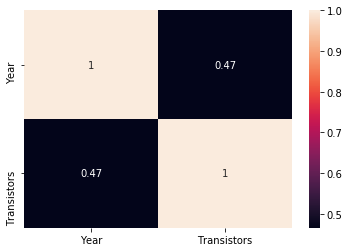

In [267]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

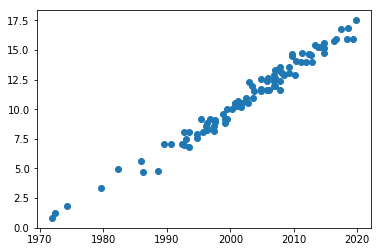

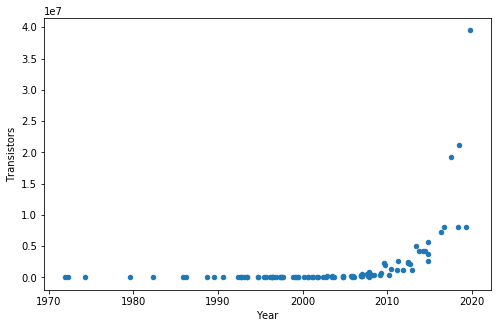

In [276]:

df.plot.scatter("Year", "Transistors", figsize=(8,5))

In [287]:
from sklearn.model_selection import train_test_split
X= df.iloc[:,0]
Y = np.log(df.iloc[:,1])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=1/3.0, random_state=0)
X_train = X_train.values.reshape(-1,1)

In [288]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [289]:
Y_pred = regressor.predict(X_test.values.reshape(-1,1))
Y_pred

array([ 1.37428051,  9.80750108, 12.4551401 ,  8.30390362,  7.73188284,
       12.73297876, 12.74932221, 14.48695789,  9.92190524, 14.41896914,
       14.31698601,  6.24462883, 12.07924073, 16.05069926, 16.83256994,
       12.70029186,  6.52246749,  8.85958094, 13.89545573, 11.2947551 ,
        9.23548031, 11.08229024,  9.02301545,  5.42745629, 11.04960334,
       11.73602827, 13.94984673, 14.91528705, 14.32038544, 15.65296504,
       15.13964994,  3.15571664])

In [290]:
Y_test

2      1.807889
30     9.147379
56    12.412373
16     7.555357
13     7.447424
61    12.358406
62    13.599643
79    13.997832
33     9.983865
78    14.557448
76    14.690979
7      4.803049
51    11.629854
89    16.770421
93    17.491811
60    13.275842
8      7.096639
22     8.202959
73    13.972514
45    10.901301
26     8.175976
43    12.304439
24     9.174362
6      4.695115
42    10.550517
48    11.575887
74    14.771022
82    15.274126
77    14.648420
87    15.789592
86    15.555977
3      3.372927
Name: Transistors, dtype: float64

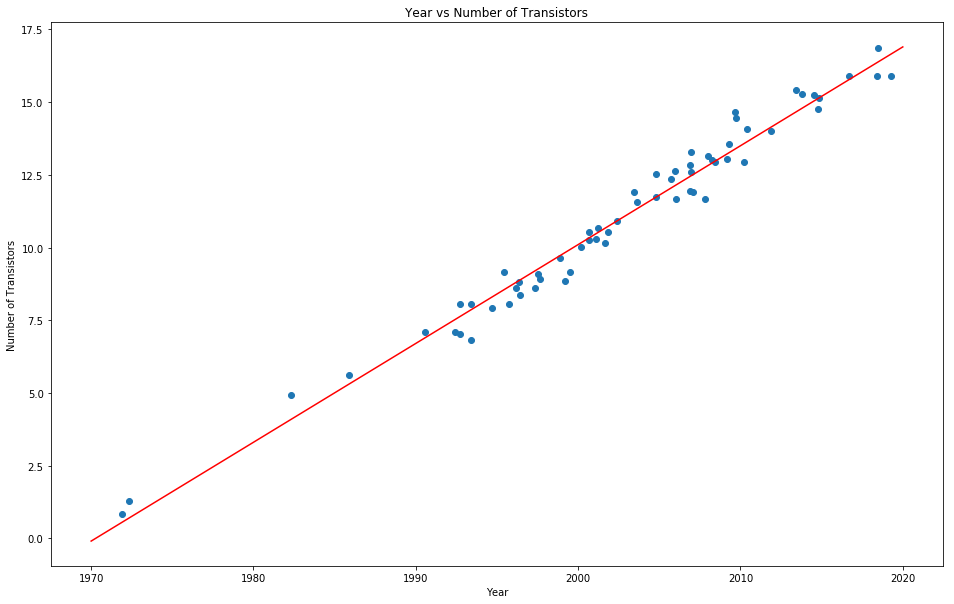

In [291]:
fig = plt.figure(figsize = (16,10))
plt.scatter(X_train, Y_train)
plt.plot(np.arange(1970,2021, 1), regressor.predict(np.arange(1970,2021,1).reshape(-1,1)),color="red")
plt.title("Year vs Number of Transistors")
plt.xlabel("Year")
plt.ylabel("Number of Transistors")
plt.show()

In [292]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [294]:
k=5
kf =KFold(n_splits=k, random_state=None)
result = cross_val_score(regressor, X_train, Y_train, cv =kf)
print("Avg accuracy : {}".format(result.mean()))

Avg accuracy : 0.9684925935287408
